In [1]:
# pre requisites
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install umap-learn

In [15]:
import numpy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap

In [16]:
# extract input embeddings as inputwords.txt
# python extract_embeddings_input.py --model TinyLlama/TinyLlama-1.1B-Chat-v1.0 --tokenizer TinyLlama/TinyLlama-1.1B-Chat-v1.0 --prompt "I like to listen to music on my way car own computer walk morning daily smart head radio Days Change Product Cat one redirect sent Font Alex weak dash destroy static Should Digital gender bag patch circle course Dictionary toggle cancel Free fish phone mother father woman man king queen" --output_prefix inputwords
# words= [ "<s>", "I", "like", "to", "listen", "to", "music", "on", "my", "way", "car", "own", "computer", "walk", "morning", "daily", "smart", "head", "radio", "Days", "Change", "Product", "Cat", "one", "redirect", "sent", "Font", "Alex", "weak", "dash", "destroy", "static", "Should", "Digital", "gender", "bag", "patch", "circle", "course", "Dictionary", "toggle", "cancel", "Free", "fish", "phone", "mother", "father", "woman", "man", "king", "queen"]

# python extract_embeddings_input.py --model TinyLlama/TinyLlama-1.1B-Chat-v1.0 --tokenizer TinyLlama/TinyLlama-1.1B-Chat-v1.0 --prompt "mother father woman man king queen" --output_prefix inputwords
words= [ "<s>", "mother", "father", "woman", "man", "king", "queen"]

# Load embeddings
#dimensions = numpy.empty((0, 2048))   # replace below if don't want to load initial input embeddings from extract_embeddings_input.py
dimensions = numpy.loadtxt("../embeddings/inputwords.txt")

# Apply t-sne to all embeddings
data = numpy.array(dimensions)
tsne = TSNE(n_components=2, metric="nan_euclidean", max_iter=1000, perplexity=3, method="exact")
data_2d = tsne.fit_transform(data)


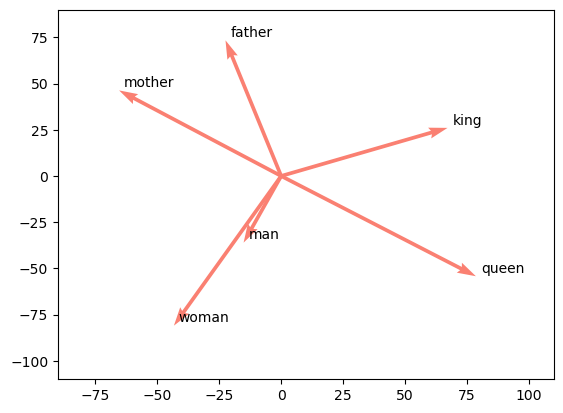

In [17]:
skip_first_token = 1

#set up plot 
fig, ax = plt.subplots()
ax.set_xlim([-90, 110])
ax.set_ylim([-110, 90])

# plot all input tokens skipping first if needed
for idx in range(skip_first_token, len(words)):
    ax.quiver(0, 0, data_2d[idx][0], data_2d[idx][1], angles='xy', scale_units='xy', scale=1, color='salmon')
    #print("x: %5.5f y: %5.5f" % (data_2d[idx][0], data_2d[idx][1]))

#label vectors 
posOffset=2
for i,pos in enumerate(data_2d[skip_first_token:len(words)]):
    ax.annotate(words[i+skip_first_token], (pos[0], pos[1]), xytext=(pos[0]+posOffset, pos[1]+posOffset),)


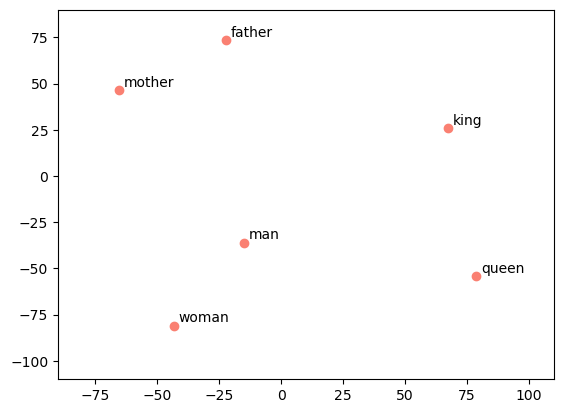

In [18]:
skip_first_token = 1

#set up plot 
fig, ax = plt.subplots()
ax.set_xlim([-90, 110])
ax.set_ylim([-110, 90])

# just plots if needed
ax.scatter(data_2d[skip_first_token:len(words),0], data_2d[skip_first_token:len(words),1], color="salmon")

#label vectors 
posOffset=2
for i,pos in enumerate(data_2d[skip_first_token:len(words)]):
    ax.annotate(words[i+skip_first_token], (pos[0], pos[1]), xytext=(pos[0]+posOffset, pos[1]+posOffset),)


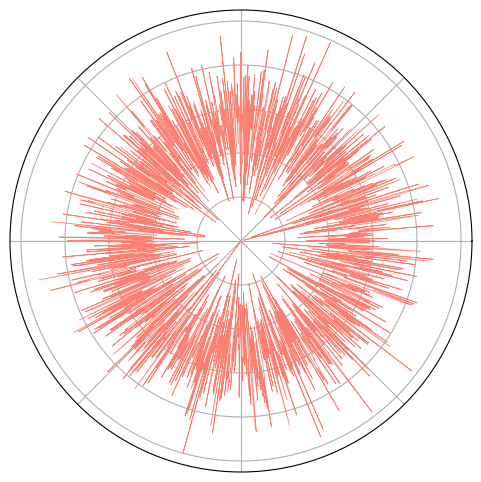

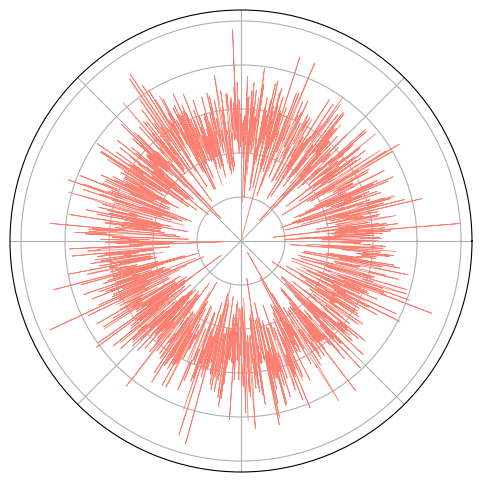

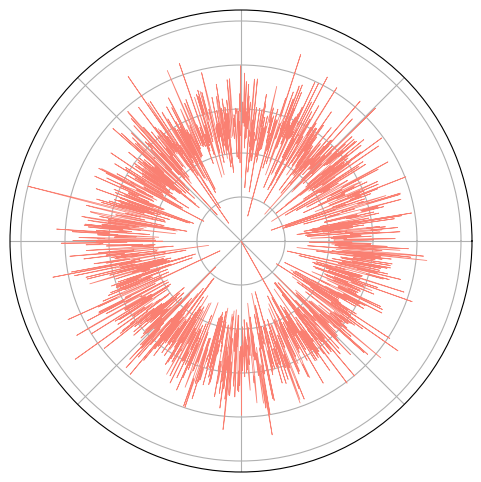

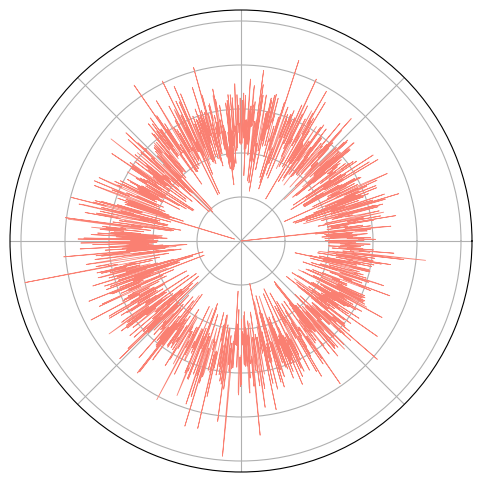

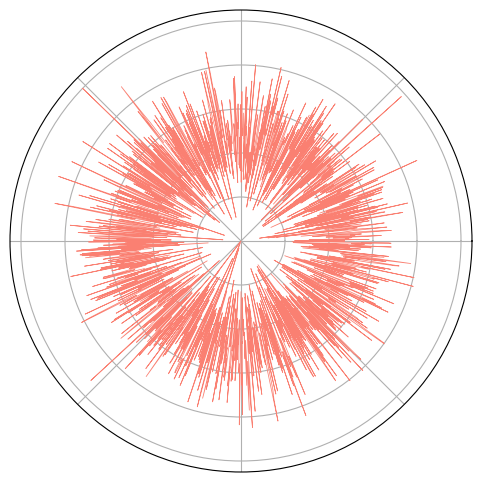

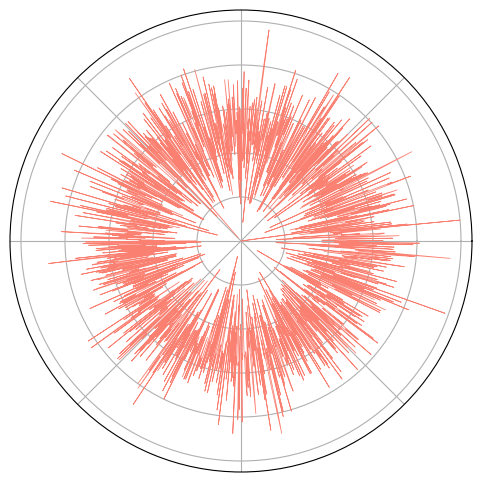

In [23]:
for idx in range(skip_first_token, len(words)):

    # Original list of floating point numbers
    values = numpy.array(data[idx])
    
    # Normalize values to the range [0,1] for better visualization
    min_val = numpy.min(values)
    max_val = numpy.max(values)
    normalized_values = (values - min_val) / (max_val - min_val)
    # Define the number of variables
    num_vars = len(values)
    
    # Compute the angle for each variable
    angles = numpy.linspace(0, 2 * numpy.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot by repeating the first value and angle
    normalized_values = numpy.append(normalized_values, normalized_values[0])
    angles += angles[:1]
    
    # Create the figure and polar axis
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Plot the data
    #ax.fill(angles, normalized_values, color='blue', alpha=0.25)
    #ax.plot(angles, normalized_values, color='blue', linewidth=2)

    ax.plot(angles, normalized_values, color='salmon', linewidth=0.55)

    # remove angle labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    #plt.show()
    # save plot of each layer
    plt.savefig("../spider-"+str(idx)+".png")
